<a href="https://colab.research.google.com/github/samliske/Sanne-the-Bird/blob/main/Sanne_Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

filename = 'sanneAltitudes'

df = pd.read_csv('/content/drive/MyDrive/bird_migration.csv')
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.sort_values(by=['date_time'], ascending=True)

start_time = df['date_time'].min()
df['elapsed_time'] = (df['date_time'] - start_time).dt.total_seconds()

sanne_data = df[df['bird_name'] == 'Sanne']
print(len(sanne_data))
df.head()

21004


,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,elapsed_time
40916,40916,55,2013-08-15 00:01:08+00:00,833,-91.499509,49.931065,2.281893,0.372156,Sanne,0.0
0,0,71,2013-08-15 00:18:08+00:00,851,-150.469753,49.419860,2.120733,0.150000,Eric,1020.0
19795,19795,382,2013-08-15 00:20:45+00:00,864,145.179141,50.213455,4.394506,16.482439,Nico,1177.0
40917,40917,54,2013-08-15 00:31:00+00:00,833,-141.804053,49.931076,2.281900,1.318484,Sanne,1792.0
1,1,68,2013-08-15 00:48:07+00:00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2819.0


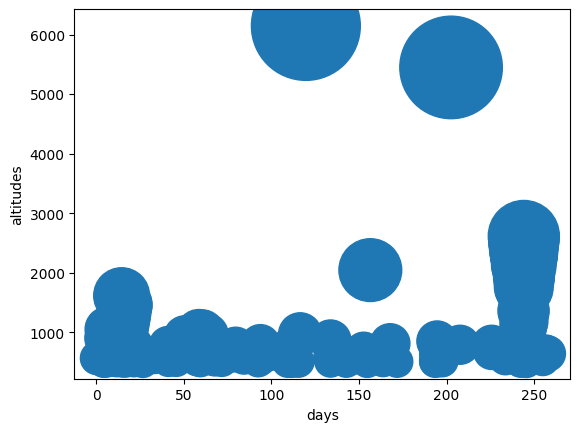

In [ ]:
import matplotlib.pylab as plt

filtered_sanne_data = sanne_data[sanne_data['altitude'] > 500]

sanne_dates = filtered_sanne_data['elapsed_time'].values / (3600 * 24)
sanne_altitudes = filtered_sanne_data['altitude'].values

plt.scatter(sanne_dates, sanne_altitudes, s=sanne_altitudes)
plt.xlabel('days')
plt.ylabel('altitudes')

times_days = max(sanne_dates) - sanne_dates

n_events = len(filtered_sanne_data)
plt.show()

In [ ]:
def map_value(value, min_value, max_value, min_result, max_result):

  result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
  return result



In [ ]:
days_per_beat = 10

t_data = times_days / days_per_beat

duration_beats = max(t_data)
print('Duration:', duration_beats, 'beats')

Duration: 25.734533564814814 beats


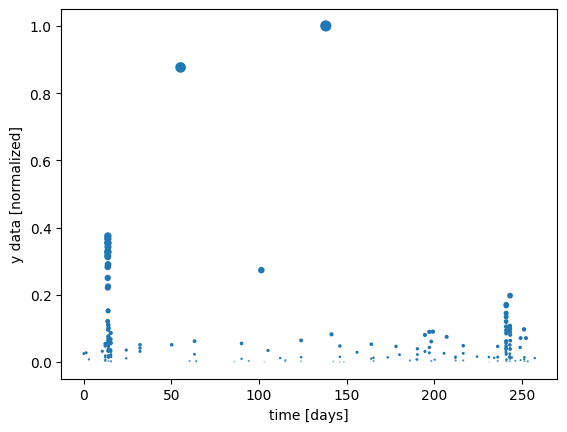

In [ ]:
y_data = map_value(sanne_altitudes, min(sanne_altitudes), max(sanne_altitudes), 0, 1)

plt.scatter(times_days, y_data, s=50*y_data)
plt.xlabel('time [days]')
plt.ylabel('y data [normalized]')
plt.show()

In [ ]:
!pip install audiolazy

In [ ]:
import itertools as it

MIDI_A4 = 69

def str2midi(note_string):
    """Given a note string name (e.g. "Bb4"), returns its MIDI pitch number. (From audiolazy)
    """

    data = note_string.strip().lower()
    name2delta = {"c": -9, "d": -7, "e": -5, "f": -4, "g": -2, "a": 0, "b": 2}
    accident2delta = {"b": -1, "#": 1, "x": 2}
    accidents = list(it.takewhile(lambda el: el in accident2delta, data[1:]))
    octave_delta = int(data[len(accidents) + 1:]) - 4
    return (MIDI_A4 +
          name2delta[data[0]] + # Name
          sum(accident2delta[ac] for ac in accidents) + # Accident
          12 * octave_delta # Octave
         )

In [ ]:


str2midi('A0')

21

In [ ]:
# pentatonic notes
note_names = ['C2', 'D2', 'E2', 'G2', 'A2', 'C3', 'D3', 'E3',
              'G3', 'A3', 'C4', 'D4', 'E4', 'G4', 'A4',
              'C5', 'D5', 'E5', 'G5', 'A5']

In [ ]:
note_midis = [str2midi(n) for n in note_names]

n_notes = len(note_midis)

note_midis

[36,
 38,
 40,
 41,
 43,
 45,
 47,
 48,
 50,
 52,
 53,
 55,
 57,
 59,
 60,
 62,
 64,
 65,
 67,
 69,
 71,
 72,
 74,
 76,
 77,
 79,
 81,
 83]

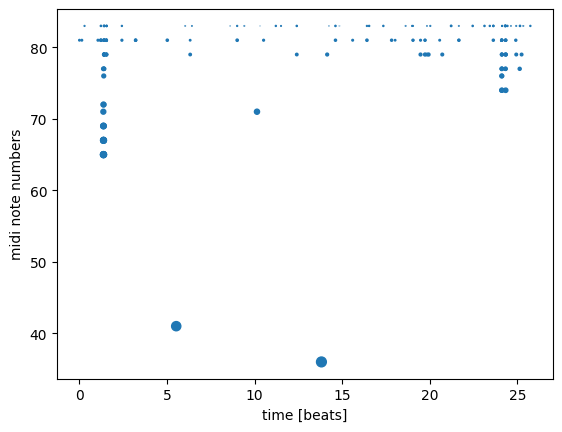

In [ ]:
midi_data = []
for i in range(n_events):
  note_index = round(map_value(y_data[i], 0, 1, n_notes-1, 0))

  midi_data.append(note_midis[note_index])

plt.scatter(t_data, midi_data, s=50*y_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

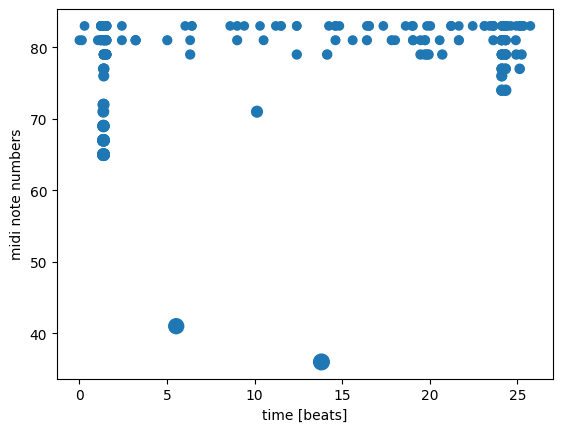

In [ ]:
vel_min, vel_max = 35, 127

vel_data = []
for i in range(n_events):
  note_velocity = round(map_value(y_data[i], 0, 1, vel_min, vel_max))

  vel_data.append(note_velocity)

plt.scatter(t_data, midi_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

In [ ]:
!pip install midiutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54567 sha256=91f3e5c5def4cb7e397676bf4c1d4b915e8b3228753af576d6a8320e5dcac512
  Stored in directory: /root/.cache/pip/wheels/af/43/4a/00b5e4f2fe5e2cd6e92b461995a3a97a2cebb30ab5783501b0
Successfully built midiutil


In [ ]:
from midiutil import MIDIFile

my_midi_file = MIDIFile(1)
my_midi_file.addTempo(track=0, time=0, tempo=60)

for i in range(n_events):
  my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data[i],
                       duration=2, volume=vel_data[i])

with open(filename + '.mid', "wb") as f:
  my_midi_file.writeFile(f)